In [2]:
import numpy as np
from sklearn.manifold import TSNE
%matplotlib inline


X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
tsne = TSNE(n_components=2)
tsne.fit_transform(X)
print(tsne.embedding_)

[[-130.4791    268.6006  ]
 [-280.54007   365.79678 ]
 [-183.35268   515.8632  ]
 [ -33.291965  418.66702 ]]


t-SNE: 11 sec


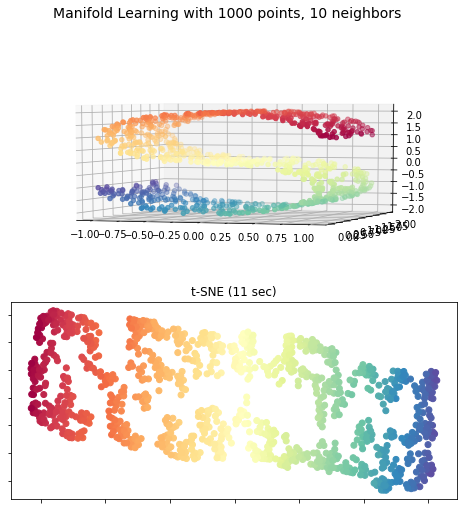

In [9]:
# coding='utf-8'
"""# 一个对S曲线数据集上进行各种降维的说明。"""
from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets

# # Next line to silence pyflakes. This import is needed.
# Axes3D

n_points = 1000
# X是一个(1000, 3)的2维数据，color是一个(1000,)的1维数据
X, color = datasets.samples_generator.make_s_curve(n_points, random_state=0)
n_neighbors = 10
n_components = 2

fig = plt.figure(figsize=(8, 8))
# 创建了一个figure，标题为"Manifold Learning with 1000 points, 10 neighbors"
plt.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)


'''绘制S曲线的3D图像'''
ax = fig.add_subplot(211, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)  # 初始化视角

'''t-SNE'''
t0 = time()
tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
Y = tsne.fit_transform(X)  # 转换后的输出
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))  # 算法用时
ax = fig.add_subplot(2, 1, 2)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())  # 设置标签显示格式为空
ax.yaxis.set_major_formatter(NullFormatter())
# plt.axis('tight')

plt.show()

In [ ]:
#Visualizing with t-SNE
#t-SNE
#from tsne import tsne #Import the t-SNE algorithm
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
import gensim
from sklearn import manifold
%matplotlib inline

# 加载模型
model=gensim.models.Word2Vec.load("wiki_zh_word_embedding_128_again.m")

X = model[model.wv.vocab]
pca = PCA(n_components=2)
tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)

#Y = tsne(X, 2, 50, 30.0)
Y = tsne.fit_transform(X)  # 转换后的输出
#Plot the t-SNE output
fig, ax = plt.subplots()
ax.plot(Y[:, 0], Y[:, 1], 'o')
ax.set_title('Tweets')
ax.set_yticklabels([]) #Hide ticks
ax.set_xticklabels([]) #Hide ticks
plt.show()


/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


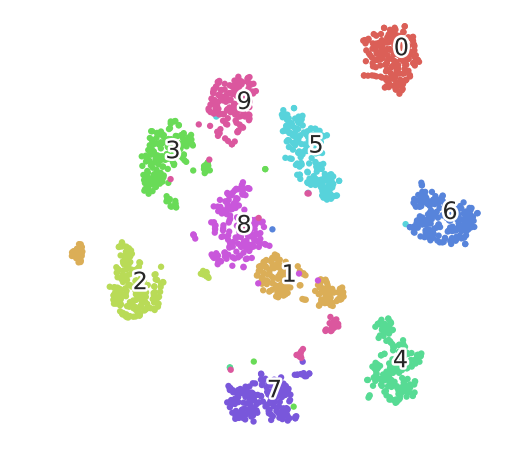

In [2]:
import numpy as np
import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
%matplotlib inline

# Random state.
RS = 20150101

import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib

# We import seaborn to make nice plots.
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
digits = load_digits()
# We first reorder the data points according to the handwritten numbers.
X = np.vstack([digits.data[digits.target==i]
               for i in range(10)])
y = np.hstack([digits.target[digits.target==i]
               for i in range(10)])
digits_proj = TSNE(random_state=RS).fit_transform(X)

def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

scatter(digits_proj, y)
plt.savefig('digits_tsne-generated.png', dpi=120)
plt.show()